In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the input data to add a channel dimension (for grayscale images)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 3: Define the CNN Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
750/750 [==============================] - 57s 72ms/step - loss: 0.6470 - accuracy: 0.7630 - val_loss: 0.4120 - val_accuracy: 0.8505
Epoch 2/10
750/750 [==============================] - 50s 66ms/step - loss: 0.4287 - accuracy: 0.8468 - val_loss: 0.3326 - val_accuracy: 0.8787
Epoch 3/10
750/750 [==============================] - 50s 66ms/step - loss: 0.3663 - accuracy: 0.8680 - val_loss: 0.3065 - val_accuracy: 0.8847
Epoch 4/10
750/750 [==============================] - 51s 68ms/step - loss: 0.3314 - accuracy: 0.8784 - val_loss: 0.2895 - val_accuracy: 0.8908
Epoch 5/10
750/750 [==============================] - 47s 63ms/step - loss: 0.3077 - accuracy: 0.8902 - val_loss: 0.2748 - val_accuracy: 0.8978
Epoch 6/10
750/750 [==============================] - 50s 67ms/step - loss: 0.2833 - accuracy: 0.8965 - val_loss: 0.2679 - val_accuracy: 0.8987
Epoch 7/10
750/750 [==============================] - 50s 67ms/step - los

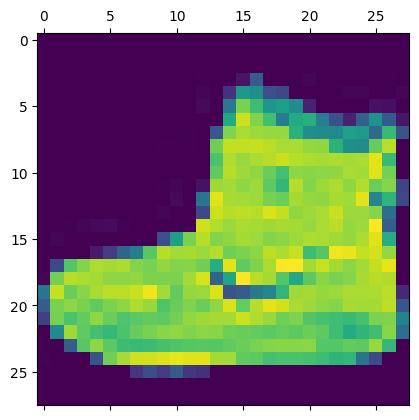

In [ ]:
plt.matshow(X_train[0])

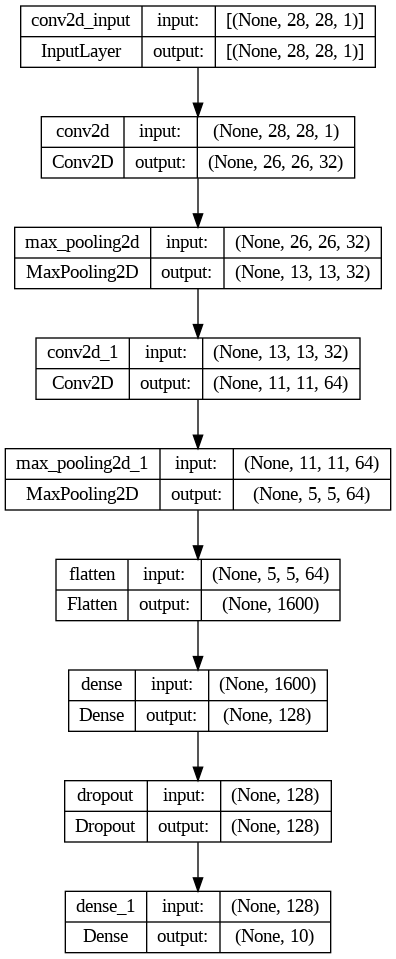

In [ ]:
# Visualize the model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


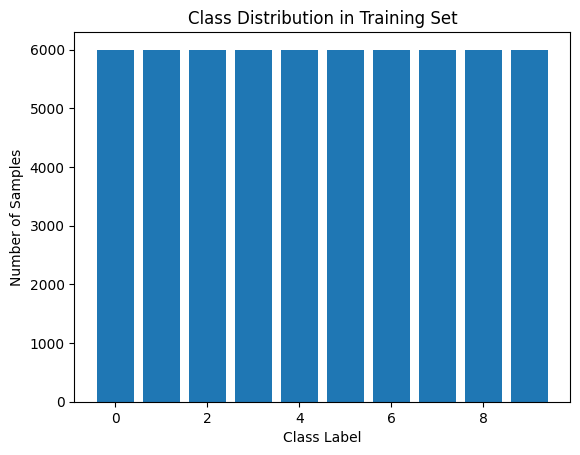

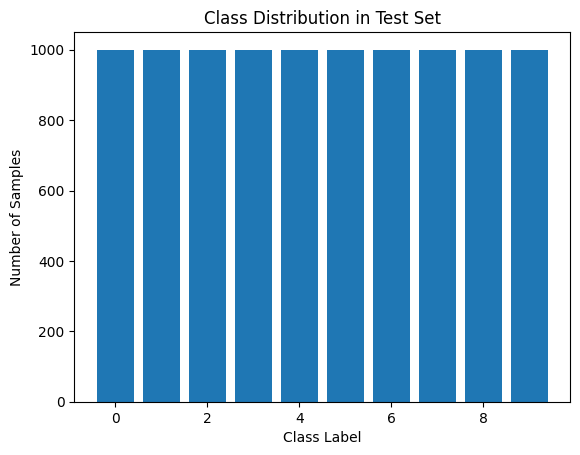

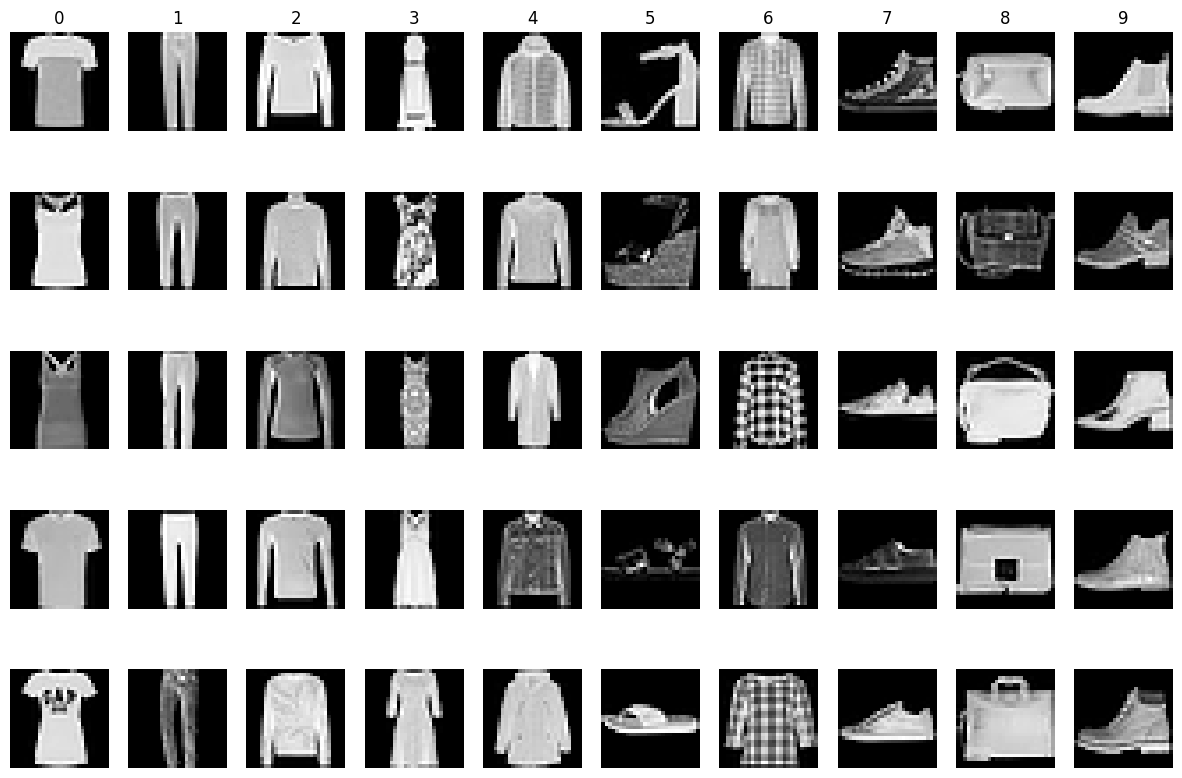

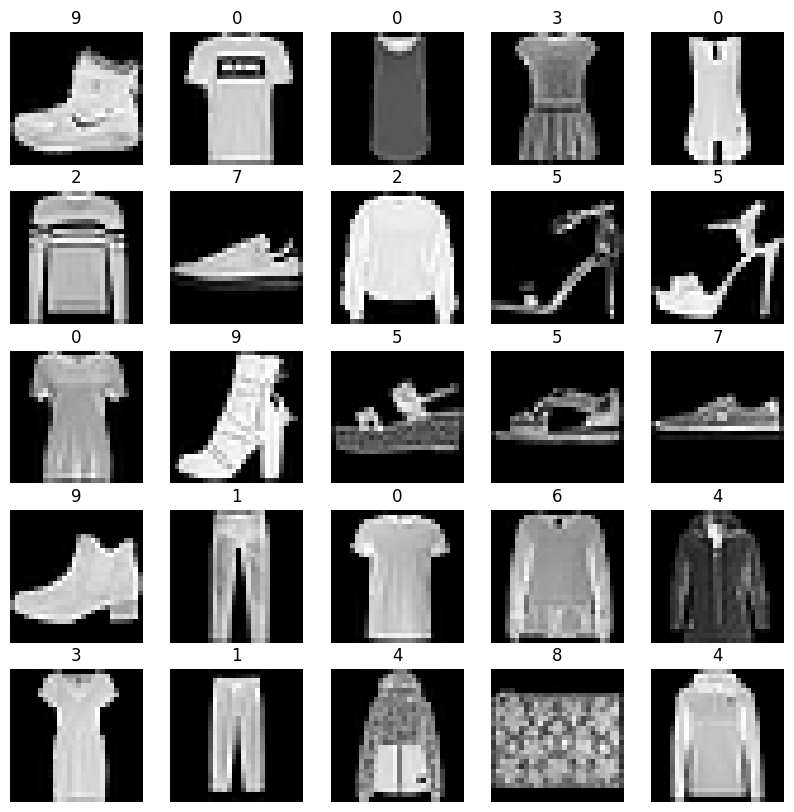

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Check the shape of the training and test datasets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Check the class distribution in the training set
class_distribution_train = np.bincount(y_train)
class_labels = np.arange(len(class_distribution_train))

plt.bar(class_labels, class_distribution_train)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Set')
plt.show()

# Check the class distribution in the test set
class_distribution_test = np.bincount(y_test)

plt.bar(class_labels, class_distribution_test)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Test Set')
plt.show()

# Display sample images from each class
num_classes = 10
samples_per_class = 5

plt.figure(figsize=(15, 10))
for i in range(num_classes):
    idxs = np.flatnonzero(y_train == i)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for j, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, j * num_classes + i + 1)
        plt.imshow(X_train[idx], cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(str(i))
plt.show()

# Visualize some sample images with their corresponding labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()
